In [1]:
%matplotlib inline

import time
import datetime as dt
import os
import glob
import json

import itertools as it

import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

os.getcwd()

'/home/edmz/Data Covid/Code'

In [2]:
from dicts_paths_v1 import *
from calc_functions_v1 import *
from graph_functions_v1 import *

https://www.data.gouv.fr/fr/datasets/donnees-hospitalieres-relatives-a-lepidemie-de-covid-19/

https://www.data.gouv.fr/fr/datasets/donnees-relatives-aux-resultats-des-tests-virologiques-covid-19/

https://www.data.gouv.fr/fr/datasets/donnees-relatives-aux-personnes-vaccinees-contre-la-covid-19-1/

In [3]:
print(today)
print(date_choice)
print(date)
print(date_text)

2021-04-09
2021-04-09
2021-04-09
09/04/2021


### File paths

In [4]:
print('SIDEP\n   Données d\'entrée :') 
print(path_test)
print(fname_temp_test)
print(fname_output_test)

print('Données hospitalières\n   Données d\'entrée :') 
print(path_hosp)
print(fname_temp_hosp)
print(fname_output_hosp)

# print('VAC-SI\n   Données d\'entrée :') 
# print(path_vac)
# print(fname_temp_vac)
# print(fname_output_vac)

SIDEP
   Données d'entrée :
['../Data/sp-pos-quot-dep-2021-04-09-20h00.csv']
./Temp/sp-pos-quot-dep-2021-04-09-20h00
../Output/sp-pos-quot-dep-2021-04-09-20h00
Données hospitalières
   Données d'entrée :
['../Data/donnees-hospitalieres-classe-age-covid19-2021-04-09-19h52.csv']
./Temp/donnees-hospitalieres-classe-age-covid19-2021-04-09-19h52
../Output/donnees-hospitalieres-classe-age-covid19-2021-04-09-19h52


### Dictionnaries

In [5]:
print('Dict. reg_name\n     "11" :', reg_name['11'])
print('Dict. reg2dep\n     "Corse" :', reg2dep['Corse'])
print('Dict. dep2reg\n     "75" :', dep2reg['75'])
print('Dict. dep_name\n     "67" :', dep_name['67'])
print('Dict. class_2_3C\n      29 : ', class_2_3C[29])
print('Dict reg_3C_pop\n     "Grand Est" :', reg_3C_pop['Grand Est'])
print('Dict reg_2lignes\n      "Auvergne-Rhône-Alpes" :', reg_2lignes["Auvergne-Rhône-Alpes"], sep = '\n')

Dict. reg_name
     "11" : Île-de-France
Dict. reg2dep
     "Corse" : ['2A', '2B']
Dict. dep2reg
     "75" : Île-de-France
Dict. dep_name
     "67" : Bas-Rhin
Dict. class_2_3C
      29 :  0-29
Dict reg_3C_pop
     "Grand Est" : {'0-29': 1874571, '30-59': 2124342, '60+': 1512834, 'whole': 5511747}
Dict reg_2lignes
      "Auvergne-Rhône-Alpes" :
Auvergne-
Rhône-Alpes


### Functions

In [6]:
help(groupby_sum)

Help on function groupby_sum in module calc_functions_v1:

groupby_sum(d, columns)
    d: dataframe
    columns: list of column names
    returns: dataframe is grouped according to columns fed in
            other columns are summed
            dataframe is then formatted into a dataframe



In [7]:
help(columns_first)

Help on function columns_first in module calc_functions_v1:

columns_first(d, columns)
    d: dataframe
    by: a list of column names
    returns: dataframe reordered



In [8]:
help(calc_hebdo)

Help on function calc_hebdo in module calc_functions_v1:

calc_hebdo(d, columns_to_group, columns_to_sum)
    d: a dataframe
    columns_to_group: list of columns from which groups will be formed
            for example ['entity', 'three_class'] -> will calculate hebdo sums for (regionA, class1), (regionA, class2), etc.
    columns_to_sum: list of columns which values will be summed on a week-wise base
            for example ['P', 'T']



# Traitement des données SIDEP

In [9]:
fname = path_test[0]
din = pd.read_csv(fname, sep = ';', parse_dates = ['jour'], dtype = {'dep': str})
din.sample(3)

,dep,jour,P,T,cl_age90,pop
302080,83,2020-10-14,11,132,90,17690.0
182228,50,2020-09-06,0,21,29,43715.0
262570,72,2020-11-11,5,34,9,63602.0


In [10]:
d = din.copy()
d = d.rename(columns = {'dep': 'entity'})
d = columns_first(d, columns = ['entity', 'cl_age90', 'jour'])
d_dep = d
d_dep.sample(3)

,entity,cl_age90,jour,P,T,pop
357861,973,90,2021-02-27,0,1,669.0
180669,49,59,2021-03-12,45,598,102416.0
90358,26,49,2021-03-27,24,285,65055.0


In [11]:
d = din.copy()
d['reg'] = d['dep'].map(lambda x: dep2reg[x])
d = d.drop(columns = ['dep'])
dg = groupby_sum(d, columns = ['reg', 'jour', 'cl_age90'])
dg = d.rename(columns = {'reg': 'entity'})
dg = columns_first(dg, columns = ['entity', 'cl_age90', 'jour'])
d_reg = dg
d_reg.sample(3)

,entity,cl_age90,jour,P,T,pop
193561,Pays de la Loire,59,2020-10-19,15,137,40380.0
78453,Nouvelle-Aquitaine,19,2020-12-22,1,71,11416.0
70000,Bourgogne-Franche-Comté,79,2020-09-02,4,179,47831.0


In [12]:
d = din.copy()
d = d.drop(columns = ['dep'])
dg = groupby_sum(d, columns = ['jour', 'cl_age90'])
dg['entity'] = 'France entière'
dg = columns_first(dg, columns = ['entity', 'cl_age90', 'jour'])
d_nat = dg
d_nat.sample(3)

,entity,cl_age90,jour,P,T,pop
2095,France entière,49,2020-11-19,2451,33473,8.592886e+06
406,France entière,90,2020-06-18,5,1690,9.125806e+05
58,France entière,29,2020-05-18,126,6208,7.476787e+06


In [13]:
d = pd.merge(d_dep, d_reg, how = 'outer')
dout = pd.merge(d, d_nat, how = 'outer')
dout = columns_first(dout, columns = ['entity', 'cl_age90', 'jour'])
dout.head(3)

,entity,cl_age90,jour,P,T,pop
0,01,9,2020-05-13,0,16,83001.0
1,01,19,2020-05-13,1,17,84665.0
2,01,29,2020-05-13,0,34,65496.0


In [14]:
dout.tail(3)

,entity,cl_age90,jour,P,T,pop
756368,France entière,79,2021-04-06,2648,40423,5.695639e+06
756369,France entière,89,2021-04-06,1308,24275,3.245281e+06
756370,France entière,90,2021-04-06,535,12436,9.125806e+05


In [15]:
fname = fname_temp_test + '-tot.csv'
dout.to_csv(fname, sep = ';', index = False)

### SIDEP - 3 classes d'âge

In [16]:
fname = fname_temp_test + '-tot.csv'
din = pd.read_csv(fname, 
                sep = ';', 
                parse_dates = ['jour'], 
                dtype = {'entity': str},
                skiprows = [])
din.tail(3)

,entity,cl_age90,jour,P,T,pop
756368,France entière,79,2021-04-06,2648,40423,5.695639e+06
756369,France entière,89,2021-04-06,1308,24275,3.245281e+06
756370,France entière,90,2021-04-06,535,12436,9.125806e+05


In [17]:
d = din.copy()
d['three_class'] = d['cl_age90'].map(lambda x: class_2_3C[x])
d = d.drop(columns = 'cl_age90')
dg = groupby_sum(d,['entity', 'jour', 'three_class'])
dg = columns_first(dg, columns = ['entity', 'three_class', 'jour'])
dout = dg
dout.tail(10)

,entity,three_class,jour,P,T,pop
156594,Île-de-France,60+,2021-04-04,295,2792,2517033.0
156595,Île-de-France,whole,2021-04-04,1683,18833,12278210.0
156596,Île-de-France,0-29,2021-04-05,1043,10761,4792882.0
156597,Île-de-France,30-59,2021-04-05,1540,12942,4968295.0
156598,Île-de-France,60+,2021-04-05,452,4113,2517033.0
156599,Île-de-France,whole,2021-04-05,3036,27830,12278210.0
156600,Île-de-France,0-29,2021-04-06,6017,49758,4792882.0
156601,Île-de-France,30-59,2021-04-06,9120,63823,4968295.0
156602,Île-de-France,60+,2021-04-06,2168,21608,2517033.0
156603,Île-de-France,whole,2021-04-06,17313,135230,12278210.0


In [18]:
fname = fname_temp_test + '-tot-3C.csv'
dout.to_csv(fname, sep = ';', index = False)

### SIDEP - calculs chiffres hebdomadaires

In [19]:
fname = fname_temp_test + '-tot-3C.csv'
din = pd.read_csv(fname, 
                sep = ';', 
                parse_dates = ['jour'], 
                dtype = {'entity': str},
                skiprows = [])
din.sample(3)

,entity,three_class,jour,P,T,pop
124458,94,60+,2020-11-17,89,1186,288118.0
57920,44,0-29,2020-05-17,1,23,531273.0
53119,40,whole,2020-09-09,69,1295,411979.0


In [20]:
d = din.copy()

dh = calc_hebdo(d, 
           columns_to_group = ['entity', 'three_class'], 
           columns_to_sum = ['P', 'T'])

0.39 s : (P hebdo, T hebdo) calculated for (01, 0-29)
0.77 s : (P hebdo, T hebdo) calculated for (01, 30-59)
1.15 s : (P hebdo, T hebdo) calculated for (01, 60+)
1.53 s : (P hebdo, T hebdo) calculated for (01, whole)
1.92 s : (P hebdo, T hebdo) calculated for (02, 0-29)
2.31 s : (P hebdo, T hebdo) calculated for (02, 30-59)
2.69 s : (P hebdo, T hebdo) calculated for (02, 60+)
3.12 s : (P hebdo, T hebdo) calculated for (02, whole)
3.51 s : (P hebdo, T hebdo) calculated for (03, 0-29)
3.89 s : (P hebdo, T hebdo) calculated for (03, 30-59)
4.27 s : (P hebdo, T hebdo) calculated for (03, 60+)
4.65 s : (P hebdo, T hebdo) calculated for (03, whole)
5.04 s : (P hebdo, T hebdo) calculated for (04, 0-29)
5.42 s : (P hebdo, T hebdo) calculated for (04, 30-59)
5.80 s : (P hebdo, T hebdo) calculated for (04, 60+)
6.20 s : (P hebdo, T hebdo) calculated for (04, whole)
6.57 s : (P hebdo, T hebdo) calculated for (05, 0-29)
6.97 s : (P hebdo, T hebdo) calculated for (05, 30-59)
7.36 s : (P hebdo, T he

57.50 s : (P hebdo, T hebdo) calculated for (37, 30-59)
57.88 s : (P hebdo, T hebdo) calculated for (37, 60+)
58.26 s : (P hebdo, T hebdo) calculated for (37, whole)
58.64 s : (P hebdo, T hebdo) calculated for (38, 0-29)
59.01 s : (P hebdo, T hebdo) calculated for (38, 30-59)
59.40 s : (P hebdo, T hebdo) calculated for (38, 60+)
59.78 s : (P hebdo, T hebdo) calculated for (38, whole)
60.17 s : (P hebdo, T hebdo) calculated for (39, 0-29)
60.55 s : (P hebdo, T hebdo) calculated for (39, 30-59)
60.94 s : (P hebdo, T hebdo) calculated for (39, 60+)
61.32 s : (P hebdo, T hebdo) calculated for (39, whole)
61.71 s : (P hebdo, T hebdo) calculated for (40, 0-29)
62.09 s : (P hebdo, T hebdo) calculated for (40, 30-59)
62.47 s : (P hebdo, T hebdo) calculated for (40, 60+)
62.89 s : (P hebdo, T hebdo) calculated for (40, whole)
63.28 s : (P hebdo, T hebdo) calculated for (41, 0-29)
63.66 s : (P hebdo, T hebdo) calculated for (41, 30-59)
64.04 s : (P hebdo, T hebdo) calculated for (41, 60+)
64.43 

114.08 s : (P hebdo, T hebdo) calculated for (74, 30-59)
114.50 s : (P hebdo, T hebdo) calculated for (74, 60+)
114.89 s : (P hebdo, T hebdo) calculated for (74, whole)
115.30 s : (P hebdo, T hebdo) calculated for (75, 0-29)
115.70 s : (P hebdo, T hebdo) calculated for (75, 30-59)
116.10 s : (P hebdo, T hebdo) calculated for (75, 60+)
116.49 s : (P hebdo, T hebdo) calculated for (75, whole)
116.88 s : (P hebdo, T hebdo) calculated for (76, 0-29)
117.28 s : (P hebdo, T hebdo) calculated for (76, 30-59)
117.67 s : (P hebdo, T hebdo) calculated for (76, 60+)
118.06 s : (P hebdo, T hebdo) calculated for (76, whole)
118.45 s : (P hebdo, T hebdo) calculated for (77, 0-29)
118.86 s : (P hebdo, T hebdo) calculated for (77, 30-59)
119.26 s : (P hebdo, T hebdo) calculated for (77, 60+)
119.64 s : (P hebdo, T hebdo) calculated for (77, whole)
120.03 s : (P hebdo, T hebdo) calculated for (78, 0-29)
120.41 s : (P hebdo, T hebdo) calculated for (78, 30-59)
120.79 s : (P hebdo, T hebdo) calculated fo

169.58 s : (P hebdo, T hebdo) calculated for (France entière, 60+)
169.98 s : (P hebdo, T hebdo) calculated for (France entière, whole)
170.37 s : (P hebdo, T hebdo) calculated for (Grand Est, 0-29)
170.76 s : (P hebdo, T hebdo) calculated for (Grand Est, 30-59)
171.15 s : (P hebdo, T hebdo) calculated for (Grand Est, 60+)
171.53 s : (P hebdo, T hebdo) calculated for (Grand Est, whole)
171.92 s : (P hebdo, T hebdo) calculated for (Hauts-de-France, 0-29)
172.31 s : (P hebdo, T hebdo) calculated for (Hauts-de-France, 30-59)
172.70 s : (P hebdo, T hebdo) calculated for (Hauts-de-France, 60+)
173.09 s : (P hebdo, T hebdo) calculated for (Hauts-de-France, whole)
173.47 s : (P hebdo, T hebdo) calculated for (Normandie, 0-29)
173.85 s : (P hebdo, T hebdo) calculated for (Normandie, 30-59)
174.24 s : (P hebdo, T hebdo) calculated for (Normandie, 60+)
174.62 s : (P hebdo, T hebdo) calculated for (Normandie, whole)
175.00 s : (P hebdo, T hebdo) calculated for (Nouvelle-Aquitaine, 0-29)
175.38 s 

In [21]:
dh.sample(3)

,entity,three_class,jour,P,T,pop,P hebdo,T hebdo
42881,32,30-59,2020-11-21,4,56,70044.0,83.0,1329.0
117056,88,0-29,2021-03-21,1,31,108776.0,213.0,5706.0
119732,90,0-29,2021-04-01,31,655,48923.0,184.0,2768.0


In [22]:
d = dh
d['incidence hebdo'] = d['P hebdo'] / d['pop'] * 100000
d['positivite hebdo'] = d['P hebdo'] / d['T hebdo'] * 100
d['taux de test hebdo'] = d['T hebdo'] / d['pop'] * 100000
d.sample(3)

,entity,three_class,jour,P,T,pop,P hebdo,T hebdo,incidence hebdo,positivite hebdo,taux de test hebdo
102447,77,whole,2021-02-15,775,8270,1423607.0,3602.0,46069.0,253.019267,7.818707,3236.075687
55033,41,30-59,2021-02-06,19,280,120994.0,182.0,3242.0,150.420682,5.613819,2679.471709
1251,01,whole,2021-03-21,30,293,656955.0,1711.0,23745.0,260.444018,7.205728,3614.402813


In [23]:
d.tail(3)

,entity,three_class,jour,P,T,pop,P hebdo,T hebdo,incidence hebdo,positivite hebdo,taux de test hebdo
156601,Île-de-France,30-59,2021-04-06,9120,63823,4968295.0,34761.0,324173.0,699.656522,10.722978,6524.833972
156602,Île-de-France,60+,2021-04-06,2168,21608,2517033.0,8720.0,88117.0,346.439637,9.895934,3500.828158
156603,Île-de-France,whole,2021-04-06,17313,135230,12278210.0,70276.0,729387.0,572.363561,9.634940,5940.499470


In [24]:
fname = fname_temp_test + '-tot-3C-processed.csv'
d.to_csv(fname, sep = ';', index = False)

# Traitement des données hospitalières

In [25]:
fname = path_hosp[0]
din = pd.read_csv(fname, sep = ';', parse_dates = ['jour'], dtype = {'dep': str})
din.sample(3)

,reg,cl_age90,jour,hosp,rea,HospConv,SSR_USLD,autres,rad,dc
58492,27,49,2021-01-07,45,7,NaN,NaN,NaN,692,13
20582,94,9,2020-06-29,0,0,NaN,NaN,NaN,6,0
63557,94,90,2021-02-01,14,1,NaN,NaN,NaN,33,22


In [26]:
d = din.copy()
d['entity'] = (d['reg']
               .map(lambda x: reg_name[str(x)] )
               .replace({
                   'Guadeloupe':'Outre-mer',
                   'Martinique':'Outre-mer',
                   'Guyane':'Outre-mer',
                   'La Réunion':'Outre-mer',
                   'Mayotte':'Outre-mer',
               })
              )
d = columns_first(d, columns = ['entity'])
d = d.drop(columns = ['reg'])
d.head(3)

,entity,cl_age90,jour,hosp,rea,HospConv,SSR_USLD,autres,rad,dc
0,Outre-mer,0,2020-03-18,0,0,NaN,NaN,NaN,0,0
1,Outre-mer,9,2020-03-18,0,0,NaN,NaN,NaN,0,0
2,Outre-mer,19,2020-03-18,0,0,NaN,NaN,NaN,0,0


In [27]:
d['three_class'] = d['cl_age90'].map(lambda x: class_2_3C[x])
d = d.drop(columns = 'cl_age90')
dg = groupby_sum(d,['entity', 'jour', 'three_class',])
# dg = (dg.reset_index()
#       .drop(columns = ['cl_age90'])
#             )
dg = columns_first(dg, ['entity', 'three_class', 'jour',])
d_reg = dg.copy()
d_reg.tail(3)

,entity,three_class,jour,hosp,rea,HospConv,SSR_USLD,autres,rad,dc
21725,Île-de-France,30-59,2021-04-09,1943,608,1130.0,162.0,43.0,24906,1304
21726,Île-de-France,60+,2021-04-09,5694,1077,2823.0,1758.0,36.0,48909,15972
21727,Île-de-France,whole,2021-04-09,7907,1726,4144.0,1941.0,96.0,79154,17423


In [28]:
d = d_reg.copy()
dg = groupby_sum(d, columns = ['jour', 'three_class',])
dg['entity'] = 'France entière'
dg = columns_first(dg, columns = ['entity', 'three_class', 'jour',])
d_nat = dg
d_nat.sample(3)

,entity,three_class,jour,hosp,rea,HospConv,SSR_USLD,autres,rad,dc
1087,France entière,whole,2020-12-14,25449,2896,0.0,0.0,0.0,177616,40320
308,France entière,0-29,2020-06-03,202,37,0.0,0.0,0.0,3406,27
585,France entière,30-59,2020-08-11,845,87,0.0,0.0,0.0,24457,1285


In [29]:
d_tot = pd.merge(d_reg, d_nat, how = 'outer')
d_tot = d_tot.drop(columns = ['HospConv', 'SSR_USLD', 'autres', 'rad'])
d_tot.sample(3)

,entity,three_class,jour,hosp,rea,dc
15070,Occitanie,60+,2020-12-18,1191,163,1905
1173,Auvergne-Rhône-Alpes,30-59,2021-01-05,419,73,188
4402,Bretagne,60+,2021-02-05,636,31,943


In [30]:
d = d_tot
d = calc_delta_hebdo(d, columns_to_group = ['entity', 'three_class'], columns_to_delta = ['dc'])

0.55 s : (dc hebdo) calculated for (Auvergne-Rhône-Alpes, 0-29)
1.06 s : (dc hebdo) calculated for (Auvergne-Rhône-Alpes, 30-59)
1.58 s : (dc hebdo) calculated for (Auvergne-Rhône-Alpes, 60+)
2.12 s : (dc hebdo) calculated for (Auvergne-Rhône-Alpes, whole)
2.63 s : (dc hebdo) calculated for (Bourgogne-Franche-Comté, 0-29)
3.14 s : (dc hebdo) calculated for (Bourgogne-Franche-Comté, 30-59)
3.66 s : (dc hebdo) calculated for (Bourgogne-Franche-Comté, 60+)
4.19 s : (dc hebdo) calculated for (Bourgogne-Franche-Comté, whole)
4.73 s : (dc hebdo) calculated for (Bretagne, 0-29)
5.29 s : (dc hebdo) calculated for (Bretagne, 30-59)
5.83 s : (dc hebdo) calculated for (Bretagne, 60+)
6.35 s : (dc hebdo) calculated for (Bretagne, whole)
6.87 s : (dc hebdo) calculated for (Centre-Val de Loire, 0-29)
7.39 s : (dc hebdo) calculated for (Centre-Val de Loire, 30-59)
7.92 s : (dc hebdo) calculated for (Centre-Val de Loire, 60+)
8.48 s : (dc hebdo) calculated for (Centre-Val de Loire, whole)
9.03 s : (dc

In [31]:
d['taux hosp'] = d.apply(lambda x: x['hosp'] / reg_3C_pop 
                                                    [ x['entity'] ]
                                                    [ x['three_class'] ] * 100000, 
                         axis = "columns")
d['taux rea'] = d.apply(lambda x: x['rea'] / reg_3C_pop
                                                    [ x['entity'] ]
                                                    [ x['three_class'] ] * 100000, 
                        axis = "columns")
d['taux décès'] = d.apply(lambda x: x['dc hebdo'] / reg_3C_pop
                                                    [ x['entity'] ]
                                                    [ x['three_class'] ] * 100000, 
                        axis = "columns")
d

,entity,three_class,jour,hosp,rea,dc,dc hebdo,taux hosp,taux rea,taux décès
0,Auvergne-Rhône-Alpes,0-29,2020-03-18,4,0,0,0.0,0.141085,0.000000,0.000000
1,Auvergne-Rhône-Alpes,30-59,2020-03-18,33,11,1,0.0,1.069485,0.356495,0.000000
2,Auvergne-Rhône-Alpes,60+,2020-03-18,127,24,6,0.0,6.014371,1.136574,0.000000
3,Auvergne-Rhône-Alpes,whole,2020-03-18,172,35,7,0.0,2.141334,0.435737,0.000000
4,Auvergne-Rhône-Alpes,0-29,2020-03-19,5,1,0,0.0,0.176356,0.035271,0.000000
...,...,...,...,...,...,...,...,...,...,...
23275,France entière,whole,2021-04-08,30555,5705,71944,2040.0,45.526339,8.500336,3.039559
23276,France entière,0-29,2021-04-09,494,71,76,2.0,2.095309,0.301148,0.008483
23277,France entière,30-59,2021-04-09,5910,1703,3263,118.0,23.013183,6.631379,0.459485
23278,France entière,60+,2021-04-09,23663,3933,68517,1906.0,132.509534,22.024257,10.673337


In [32]:
dout = d
fname = fname_temp_hosp + '-processed.csv'
dout.to_csv(fname, sep = ';', index = False)

# Données VAC-SI 

In [3]:
fname = path_vac[0]
din = pd.read_csv(fname, sep = ';', parse_dates = ['jour'], dtype = {'dep': str})
din.sample(3)

,dep,clage_vacsi,jour,n_dose1,n_dose2,n_cum_dose1,n_cum_dose2
64317,61,59,2021-02-10,33,147,1976,1201
88642,84,24,2021-02-27,0,0,83,37
14157,13,74,2021-02-11,314,282,4966,1193


In [4]:
d = din.copy()
d = d[(d.dep != '00') & (d.dep != '750') & (d.dep != '970')] 
d = d.rename(columns = {'dep': 'entity'})
d = columns_first(d, columns = ['entity', 'clage_vacsi', 'jour'])
d_dep = d
d_dep.sample(3)

,entity,clage_vacsi,jour,n_dose1,n_dose2,n_cum_dose1,n_cum_dose2
1401,01,49,2021-02-27,22,4,1117,460
10694,10,49,2021-03-22,16,1,1907,641
64029,61,29,2021-03-03,2,1,211,105


In [5]:
d = din.copy()
d = d[(d.dep != '00') & (d.dep != '750') & (d.dep != '970')] #supprime lignes suspectes
d['reg'] = d['dep'].map(lambda x: dep2reg[x])
d = d.drop(columns = ['dep'])
dg = groupby_sum(d, columns = ['reg', 'jour', 'clage_vacsi'])
dg = d.rename(columns = {'reg': 'entity'})
dg = columns_first(dg, columns = ['entity', 'clage_vacsi', 'jour'])
d_reg = dg
d_reg.sample(3)

,entity,clage_vacsi,jour,n_dose1,n_dose2,n_cum_dose1,n_cum_dose2
99211,Île-de-France,49,2021-01-18,161,0,1162,0
16748,Nouvelle-Aquitaine,39,2021-02-27,2,0,693,298
11301,Grand Est,80,2021-03-11,302,104,7843,5250


In [6]:
d = din.copy()
d = d[(d.dep != '00') & (d.dep != '750') & (d.dep != '970')] 
d = d.drop(columns = ['dep'])
dg = groupby_sum(d, columns = ['jour', 'clage_vacsi'])
dg['entity'] = 'France entière'
dg = columns_first(dg, columns = ['entity', 'clage_vacsi', 'jour'])
d_nat = dg
d_nat.sample(3)

,entity,clage_vacsi,jour,n_dose1,n_dose2,n_cum_dose1,n_cum_dose2
467,France entière,59,2021-02-07,384,1261,302950,97321
1089,France entière,0,2021-04-05,57796,9749,9393309,3156855
598,France entière,49,2021-02-19,6920,4850,167156,84199


In [7]:
d = pd.merge(d_dep, d_reg, how = 'outer')
dout = pd.merge(d, d_nat, how = 'outer')
dout = columns_first(dout, columns = ['entity', 'clage_vacsi', 'jour'])
dout.head(3)

,entity,clage_vacsi,jour,n_dose1,n_dose2,n_cum_dose1,n_cum_dose2
0,01,24,2020-12-27,0,0,0,0
1,01,24,2020-12-28,0,0,0,0
2,01,24,2020-12-29,0,0,0,0


In [8]:
d = dout.copy()
d['three_class'] = d['clage_vacsi'].map(lambda x: classvac_2_3C[x])
d = d.drop(columns = 'clage_vacsi')
dg = groupby_sum(d,['entity', 'jour', 'three_class'])
dg = columns_first(dg, columns = ['entity', 'three_class', 'jour'])
dout = dg
dout.tail(10)

,entity,three_class,jour,n_dose1,n_dose2,n_cum_dose1,n_cum_dose2
48606,Île-de-France,60+,2021-04-06,17069,14712,1065728,378150
48607,Île-de-France,whole,2021-04-06,26121,16146,1494107,470974
48608,Île-de-France,0-29,2021-04-07,1264,134,48923,6608
48609,Île-de-France,30-59,2021-04-07,10786,1520,391041,87782
48610,Île-de-France,60+,2021-04-07,22048,14974,1087776,393124
48611,Île-de-France,whole,2021-04-07,34110,16629,1528217,487603
48612,Île-de-France,0-29,2021-04-08,1961,197,50884,6805
48613,Île-de-France,30-59,2021-04-08,14222,1906,405263,89688
48614,Île-de-France,60+,2021-04-08,25434,15536,1113210,408660
48615,Île-de-France,whole,2021-04-08,41638,17639,1569855,505242


In [9]:
d = dout.copy()
d['taux dose 1'] = d.apply(lambda x: x['n_cum_dose1'] / reg_3C_pop 
                                                    [ x['entity'] ]
                                                    [ x['three_class'] ] * 100000, 
                         axis = "columns")
d['taux dose 2'] = d.apply(lambda x: x['n_cum_dose2'] / reg_3C_pop
                                                    [ x['entity'] ]
                                                    [ x['three_class'] ] * 100000, 
                        axis = "columns")
d

,entity,three_class,jour,n_dose1,n_dose2,n_cum_dose1,n_cum_dose2,taux dose 1,taux dose 2
0,01,0-29,2020-12-27,0,0,0,0,0.000000,0.000000
1,01,30-59,2020-12-27,0,0,0,0,0.000000,0.000000
2,01,60+,2020-12-27,0,0,0,0,0.000000,0.000000
3,01,whole,2020-12-27,0,0,0,0,0.000000,0.000000
4,01,0-29,2020-12-28,0,0,0,0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
48611,Île-de-France,whole,2021-04-07,34110,16629,1528217,487603,12446.578125,3971.287346
48612,Île-de-France,0-29,2021-04-08,1961,197,50884,6805,1061.657683,141.981380
48613,Île-de-France,30-59,2021-04-08,14222,1906,405263,89688,8156.983432,1805.206816
48614,Île-de-France,60+,2021-04-08,25434,15536,1113210,408660,44227.072112,16235.782368


In [10]:
dout = d.copy()
fname = fname_temp_vac + '-tot-3C.csv'
dout.to_csv(fname, sep = ';', index = False)

# Fusion SIDEP et données hospitalières

In [11]:
fname = fname_temp_test + '-tot-3C-processed.csv'
d = pd.read_csv(fname, sep = ';', 
                parse_dates = ['jour'],
                dtype = {'entity': str},
               )
d.sample(3)

,entity,three_class,jour,P,T,pop,P hebdo,T hebdo,incidence hebdo,positivite hebdo,taux de test hebdo
5297,05,30-59,2020-05-21,0,4,53829.0,5.0,142.0,9.288673,3.521127,263.798324
88362,67,60+,2020-06-29,3,665,288451.0,10.0,2343.0,3.466793,0.426803,812.269675
138837,Bourgogne-Franche-Comté,30-59,2020-10-24,539,3372,1031075.0,4786.0,32959.0,464.175739,14.521072,3196.566690


In [12]:
len(d)

156604

In [13]:
fname = fname_temp_hosp + '-processed.csv'
d2 = pd.read_csv(fname, sep = ';', parse_dates = ['jour'])
d2.sample(3)

,entity,three_class,jour,hosp,rea,dc,dc hebdo,taux hosp,taux rea,taux décès
789,Auvergne-Rhône-Alpes,30-59,2020-10-01,117,16,63,1.0,3.791811,0.518538,0.032409
872,Auvergne-Rhône-Alpes,0-29,2020-10-22,45,2,2,0.0,1.587206,0.070542,0.000000
21941,France entière,30-59,2020-05-10,3344,794,1033,74.0,13.021334,3.091788,0.288152


In [14]:
len(d2)

23280

In [15]:
d = pd.merge(d2, d, how = 'outer')
d.sample(10)

,entity,three_class,jour,hosp,rea,dc,dc hebdo,taux hosp,taux rea,taux décès,P,T,pop,P hebdo,T hebdo,incidence hebdo,positivite hebdo,taux de test hebdo
33916,09,0-29,2020-06-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,15.0,43700.0,0.0,72.0,0.000000,0.000000,164.759725
12475,Nouvelle-Aquitaine,whole,2020-04-01,700.0,215.0,82.0,57.0,11.666702,3.583344,0.950003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83214,45,60+,2020-11-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,528.0,180580.0,751.0,6869.0,415.882157,10.933178,3803.854247
137238,86,60+,2020-11-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,305.0,127576.0,113.0,2698.0,88.574654,4.188288,2114.817834
29941,06,30-59,2020-06-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,428.0,409246.0,10.0,1729.0,2.443518,0.578369,422.484276
157756,977,0-29,2020-07-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,13.0,3474.0,0.0,47.0,0.000000,0.000000,1352.907311
107067,63,whole,2020-12-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,308.0,9659.0,660240.0,1150.0,28536.0,174.179086,4.029997,4322.064704
79787,42,whole,2021-03-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,339.0,4234.0,764737.0,1959.0,26303.0,256.166499,7.447820,3439.483116
62449,2B,30-59,2021-01-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,663.0,70830.0,79.0,3674.0,111.534660,2.150245,5187.067627
68677,34,30-59,2020-10-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,440.0,3120.0,435285.0,2151.0,15528.0,494.158999,13.852396,3567.317964


In [16]:
len(d)

160144

In [17]:
d.tail()

,entity,three_class,jour,hosp,rea,dc,dc hebdo,taux hosp,taux rea,taux décès,P,T,pop,P hebdo,T hebdo,incidence hebdo,positivite hebdo,taux de test hebdo
160139,978,whole,2021-04-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,81.0,35334.000000,10.0,862.0,28.301353,1.160093,2439.576612
160140,978,0-29,2021-04-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,62.0,15451.470743,5.0,228.0,32.359379,2.192982,1475.587689
160141,978,30-59,2021-04-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,136.0,15252.902558,2.0,556.0,13.112258,0.359712,3645.207841
160142,978,60+,2021-04-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,41.0,4629.626699,1.0,168.0,21.600014,0.595238,3628.802297
160143,978,whole,2021-04-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,239.0,35334.000000,8.0,952.0,22.641082,0.840336,2694.288787


In [18]:
dout = d
fname = path_synth
dout.to_csv(fname, sep = ';', index = False)

# Graphes

In [19]:
fname = path_synth
d = pd.read_csv(fname, sep = ';', parse_dates = ['jour'], dtype = {'entity': str})
d.sample(3)

,entity,three_class,jour,hosp,rea,dc,dc hebdo,taux hosp,taux rea,taux décès,P,T,pop,P hebdo,T hebdo,incidence hebdo,positivite hebdo,taux de test hebdo
44525,17,30-59,2020-06-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,50.0,230945.0,1.0,307.0,0.433004,0.325733,132.932083
13213,Nouvelle-Aquitaine,30-59,2020-10-03,56.0,15.0,20.0,1.0,2.499043,0.669386,0.044626,140.0,2368.0,2240858.0,1533.0,30087.0,68.411296,5.095224,1342.655358
75375,39,whole,2020-11-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.0,457.0,257849.0,632.0,6524.0,245.104693,9.687308,2530.163002


In [20]:
entities = d['entity'].unique()
three_class = d['three_class'].unique()
regions = entities[:14]
last_week = d.jour >= np.datetime64(dt.datetime.fromisoformat(date) - dt.timedelta(weeks = 1))
regions_ordered = (d[(last_week) 
                    & (d.entity.isin(regions))
                    & (d.three_class == '60+')]
                   .groupby('entity')['taux hosp']
                   .mean()
                   .sort_values(ascending = False)
                   .index
                   .tolist())
regions_ordered

['Île-de-France',
 'Hauts-de-France',
 "Provence-Alpes-Côte d'Azur",
 'Auvergne-Rhône-Alpes',
 'Grand Est',
 'Normandie',
 'Bourgogne-Franche-Comté',
 'Centre-Val de Loire',
 'Occitanie',
 'Corse',
 'Pays de la Loire',
 'Bretagne',
 'Outre-mer',
 'Nouvelle-Aquitaine']

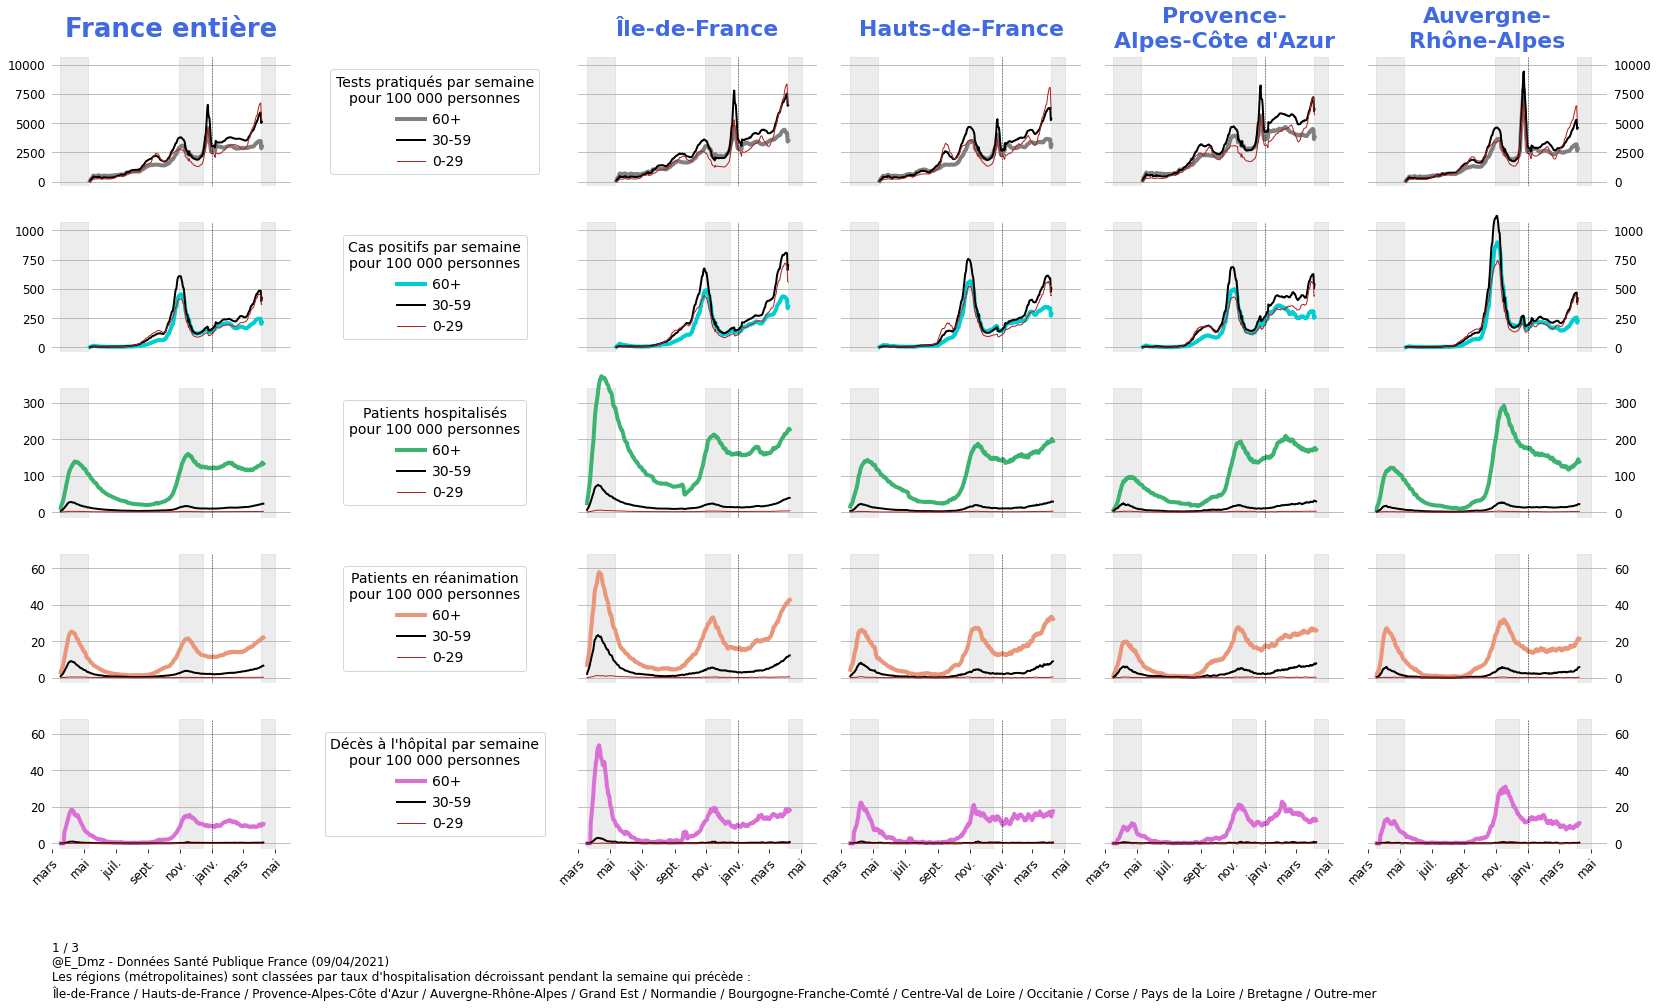

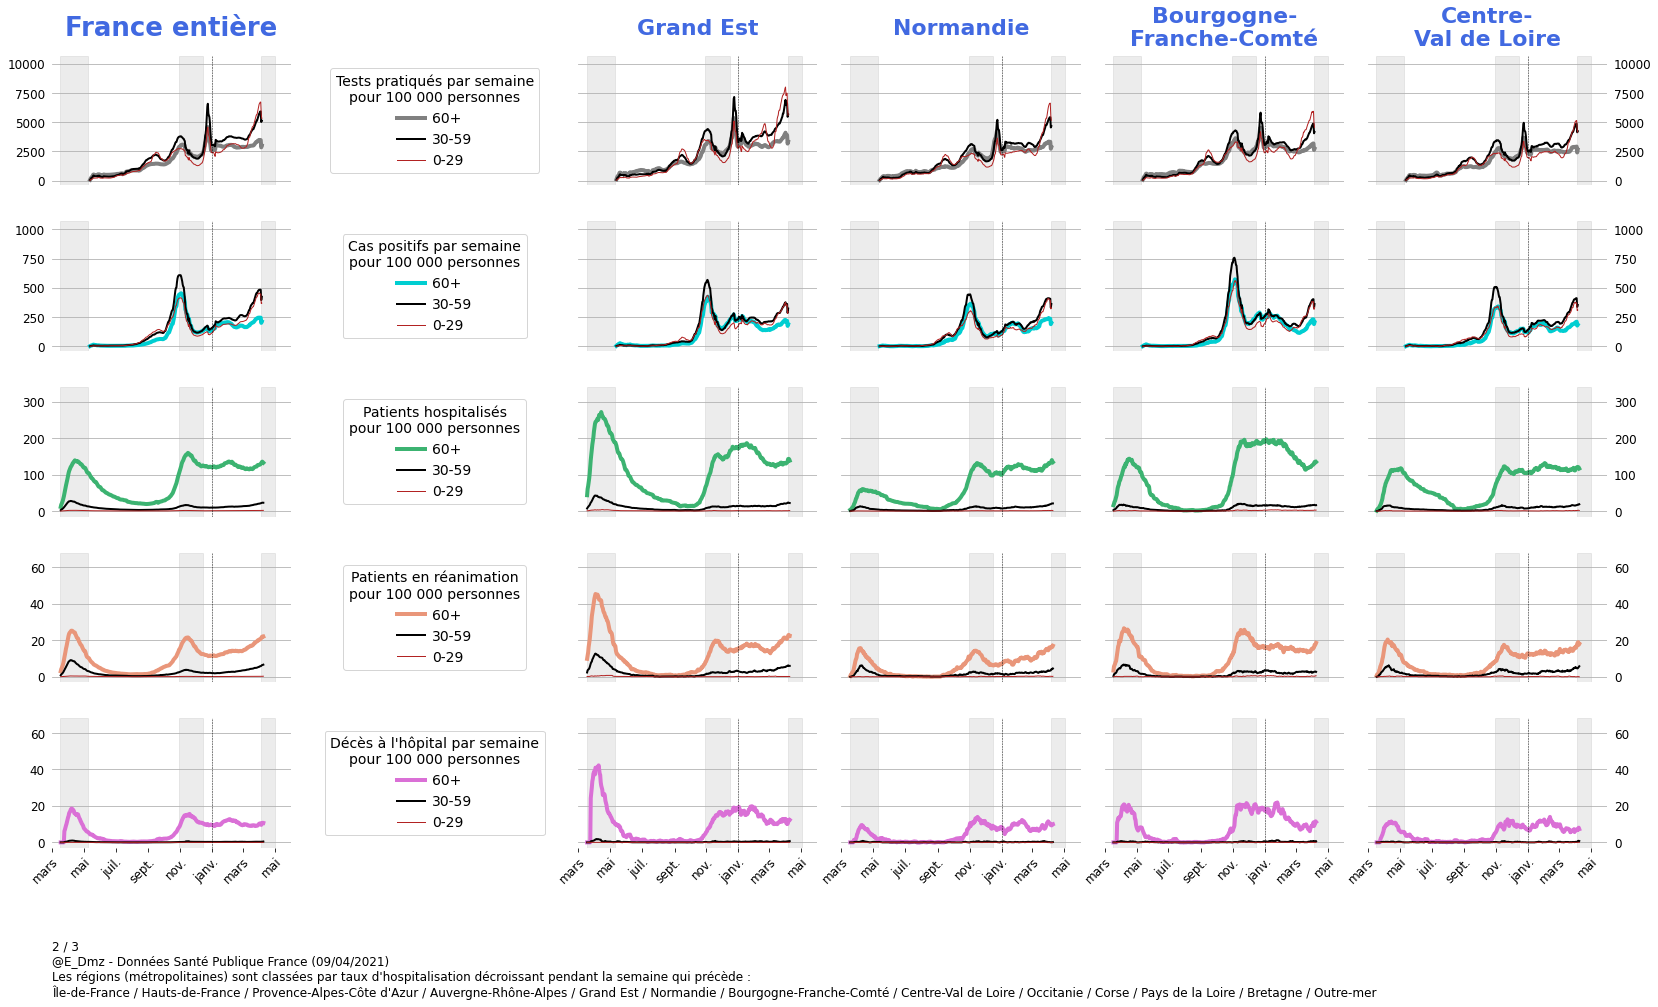

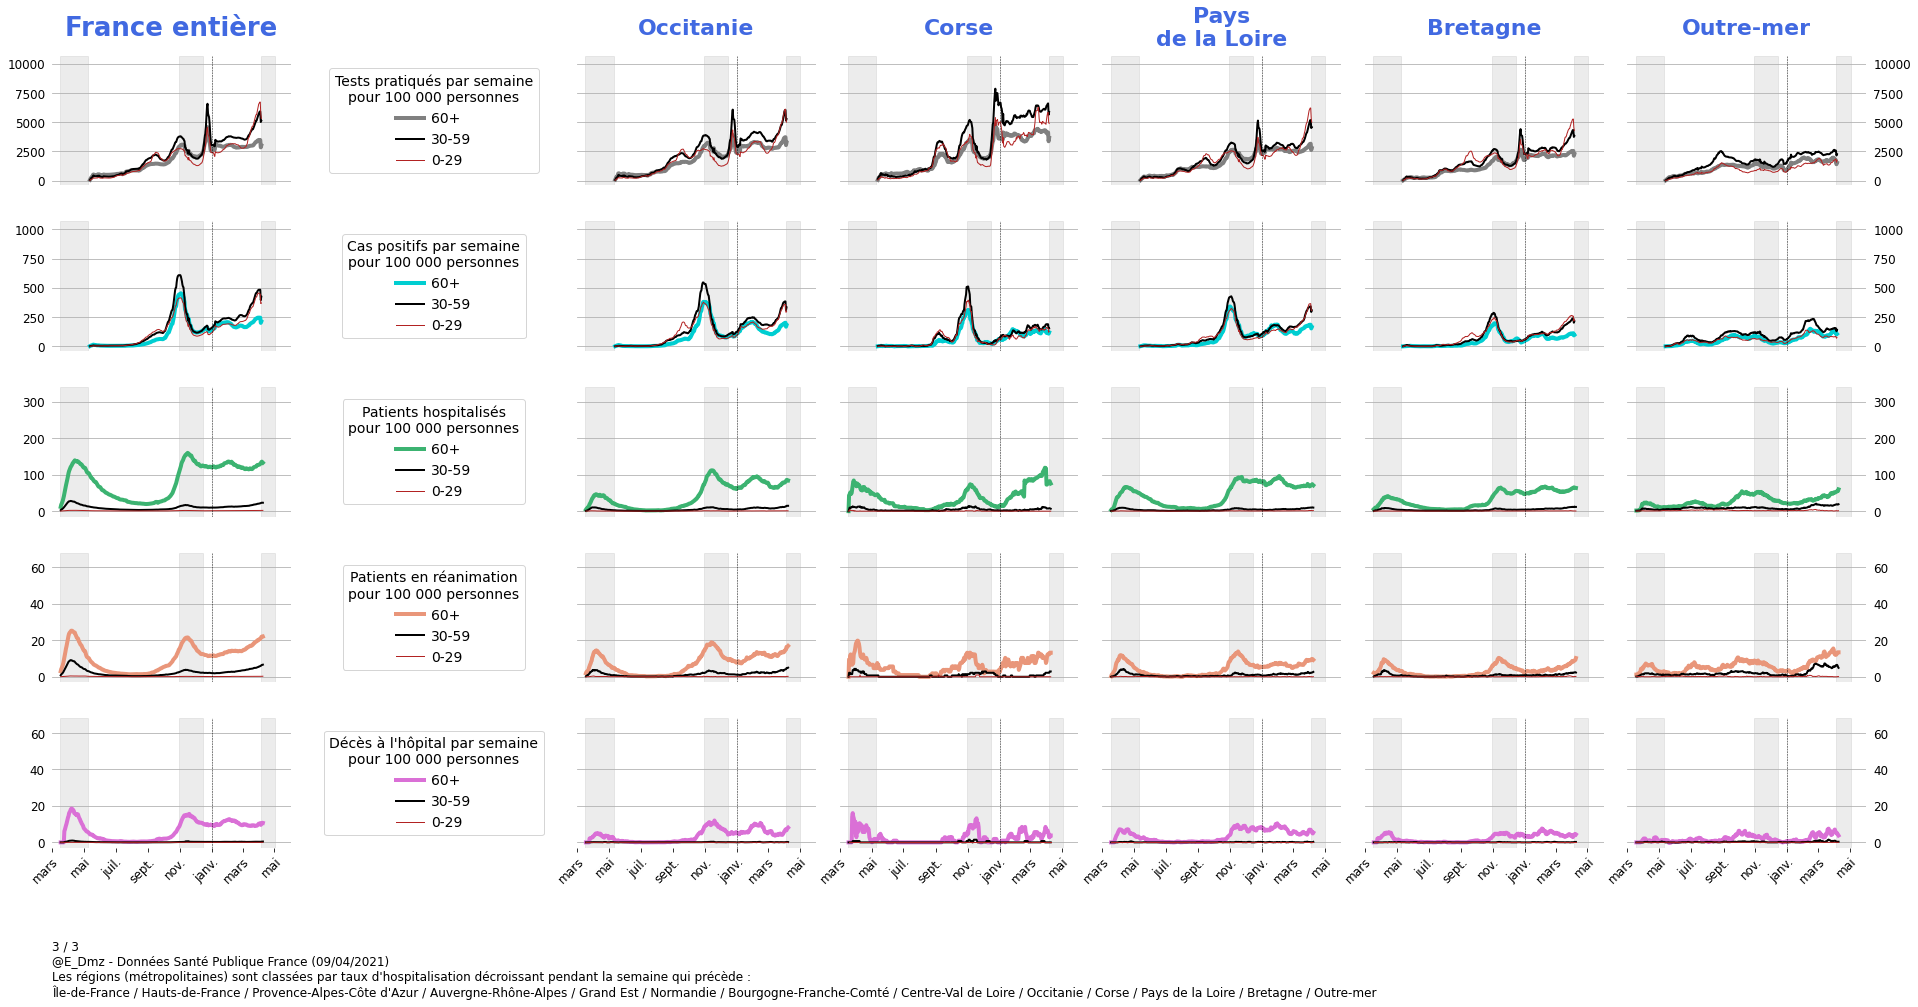

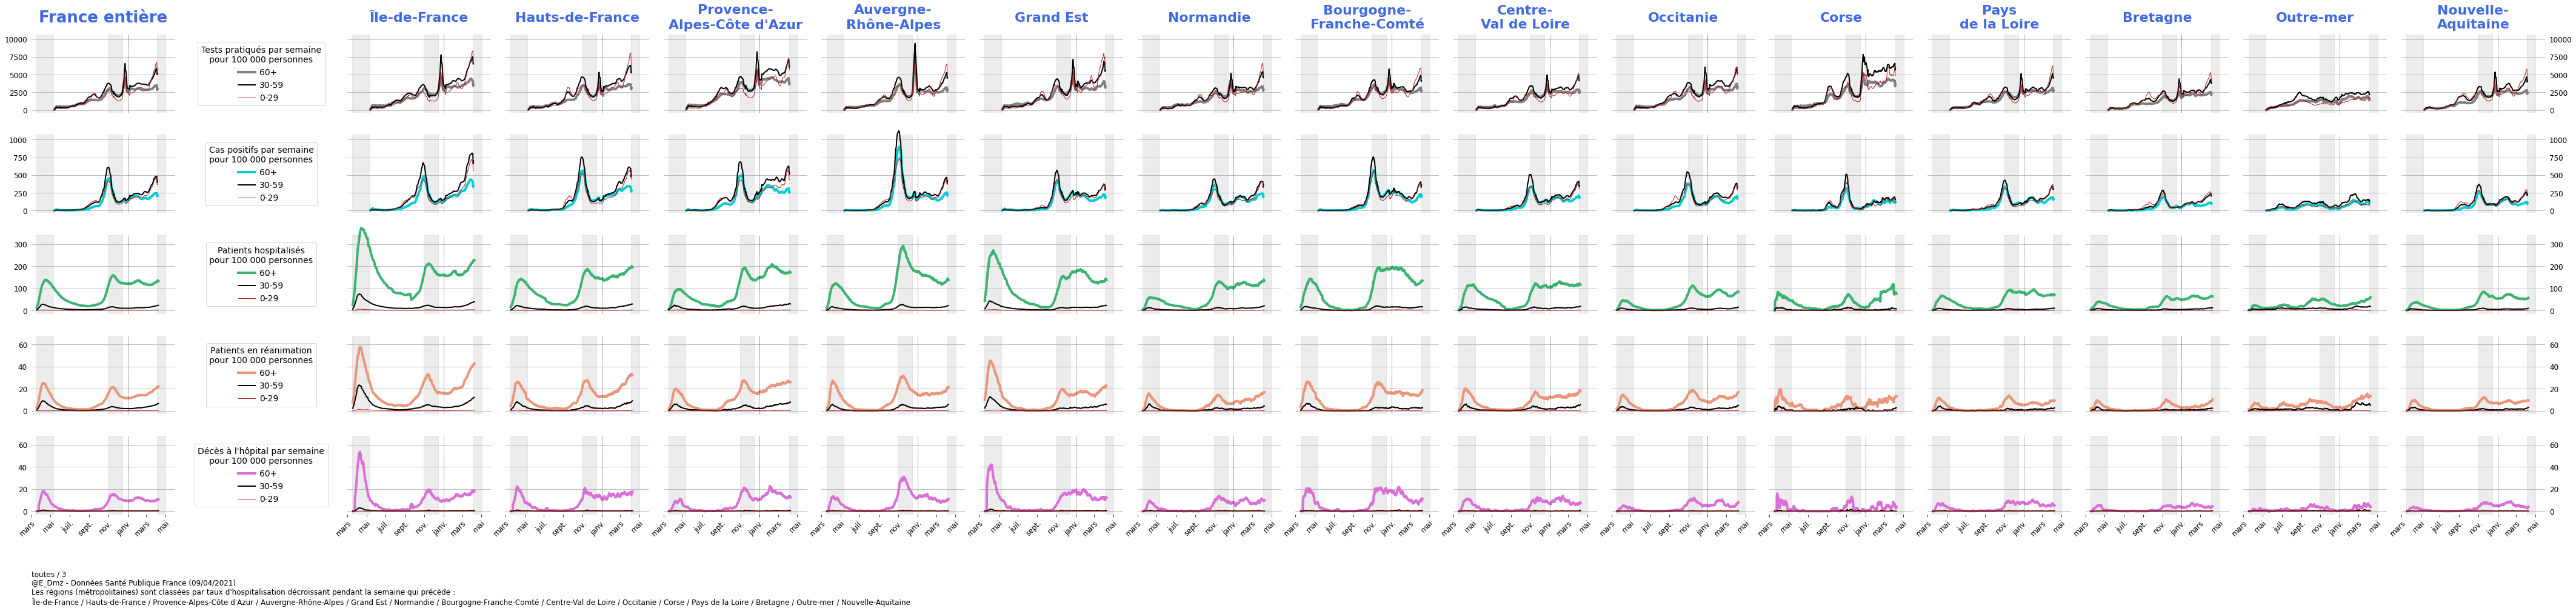

In [21]:
produce_fig_lines(d, regions_ordered[:4], regions_ordered[:-1], 1)
produce_fig_lines(d, regions_ordered[4:8], regions_ordered[:-1], 2)
produce_fig_lines(d, regions_ordered[8:-1], regions_ordered[:-1], 3)
produce_fig_lines(d, regions_ordered, regions_ordered, 'toutes')

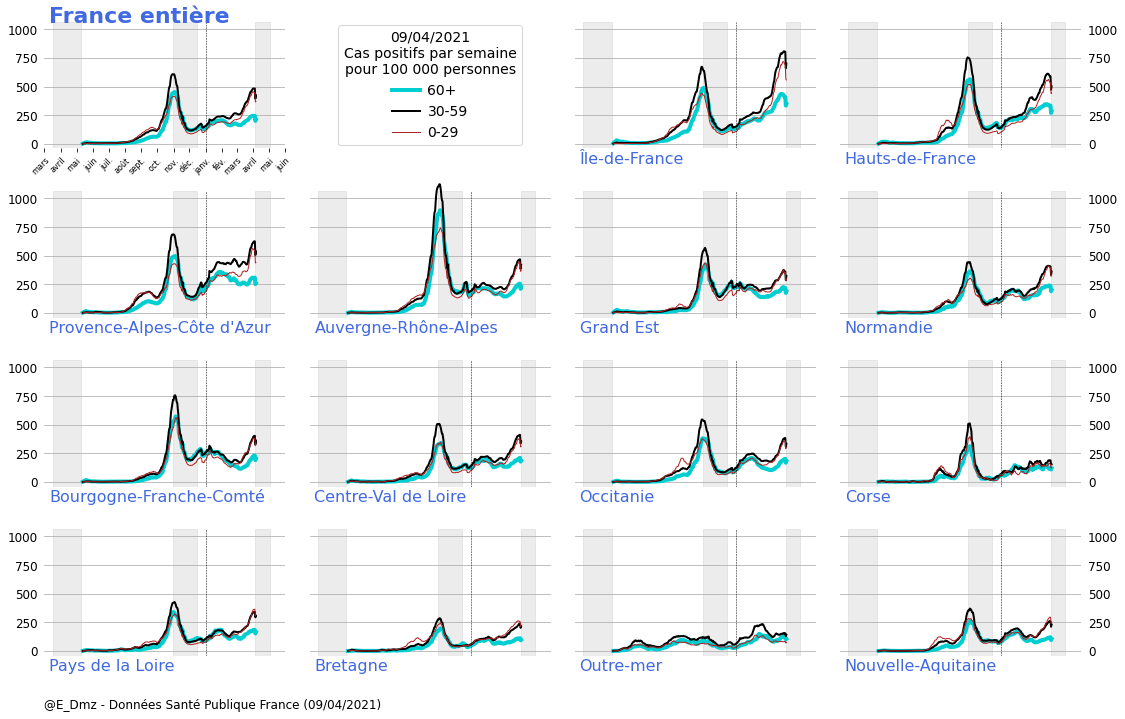

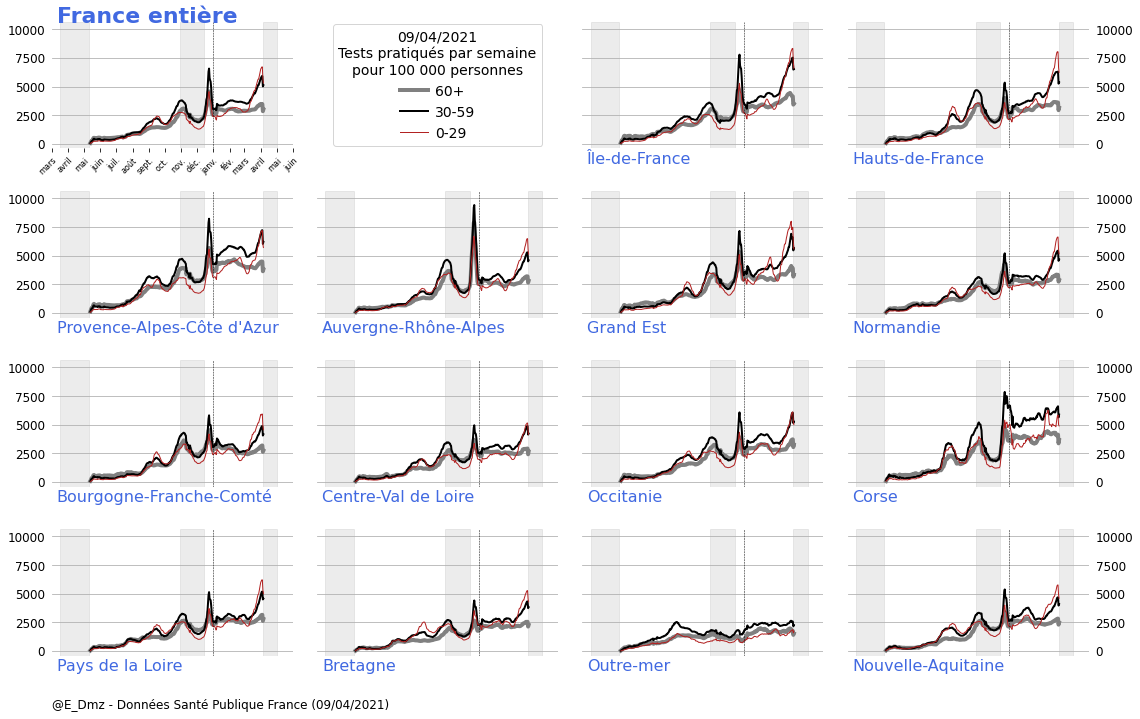

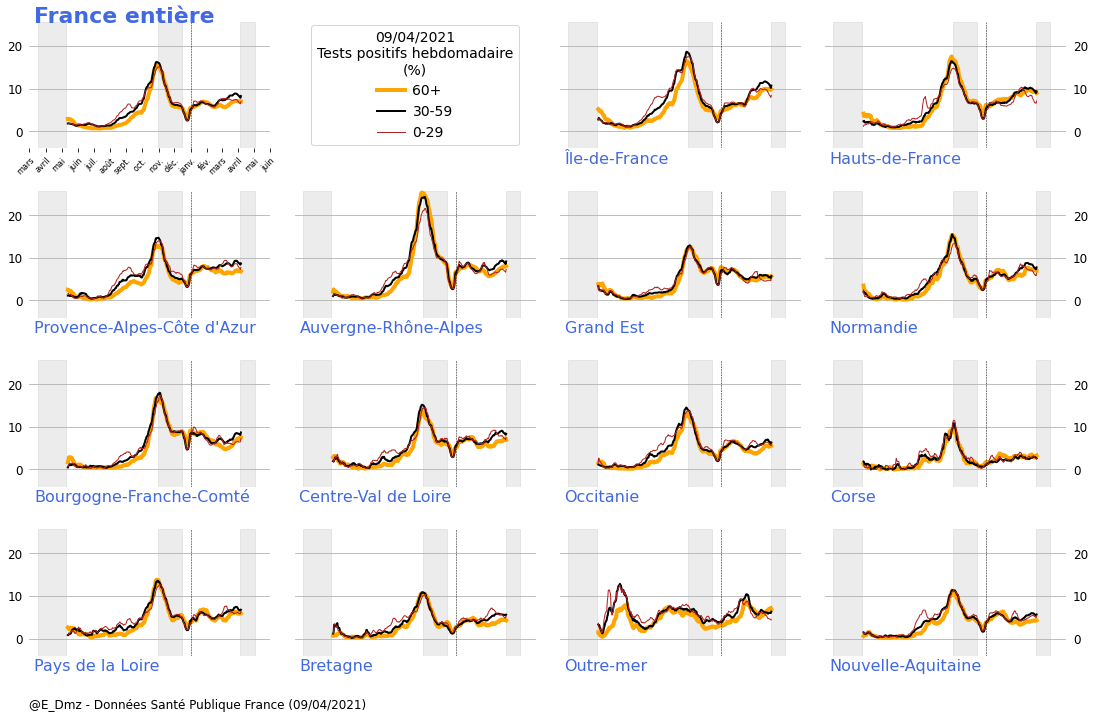

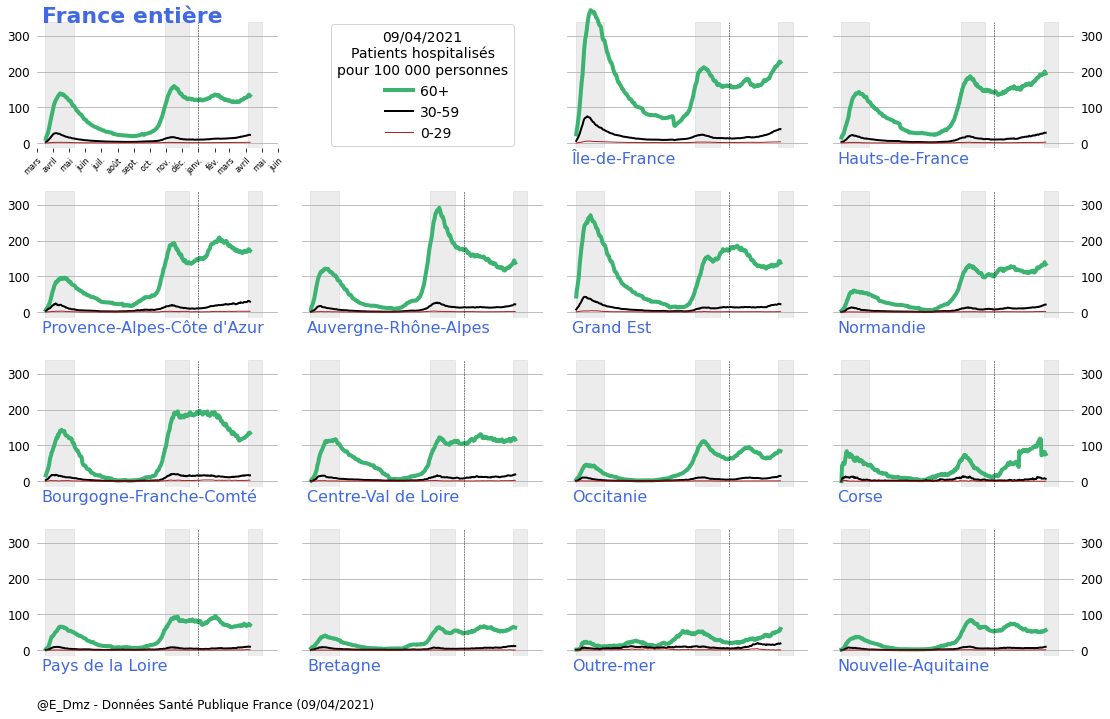

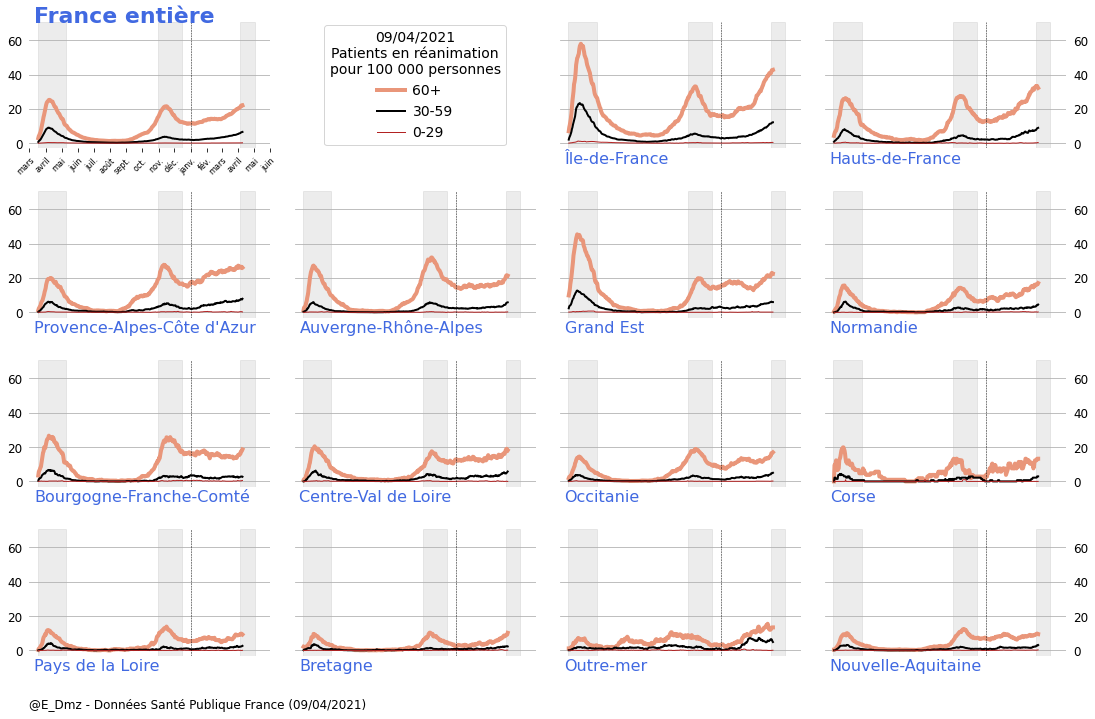

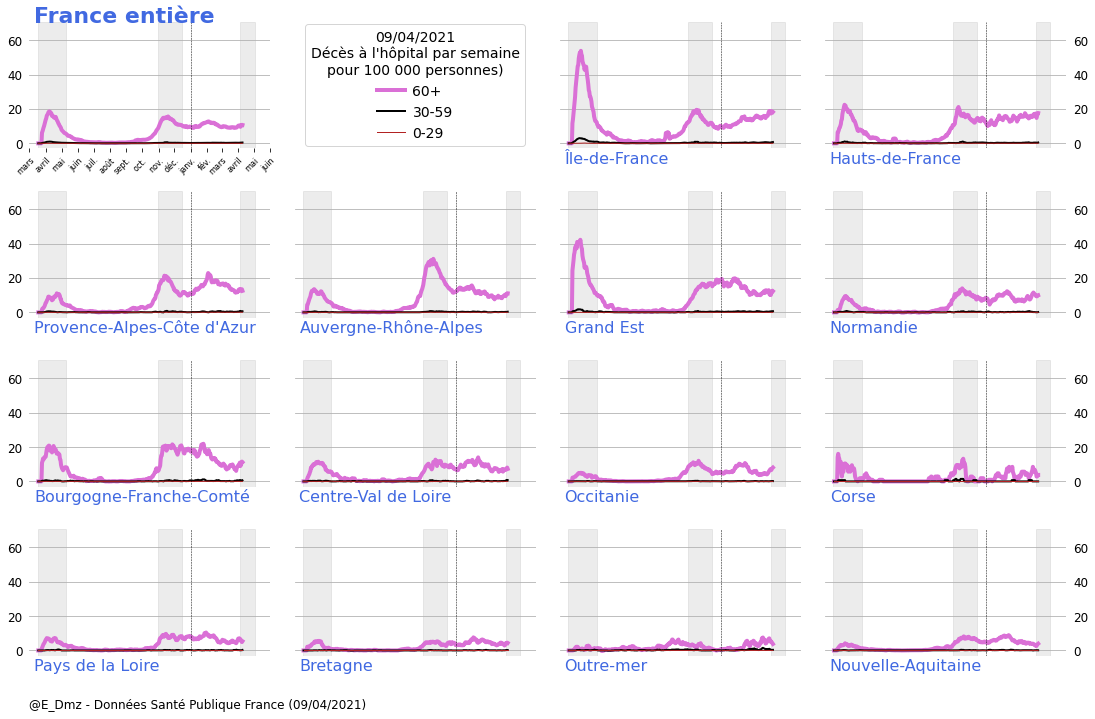

In [22]:
produce_fig(ymin = -40,
    ymax = 1190,
            d = d,
    column_to_plot = "incidence hebdo",
    main_color = "darkturquoise",
    title = '{}\nCas positifs par semaine\npour 100 000 personnes'.format(date_text),
    regions_ordered = regions_ordered,
    fname = fname_output_synth + '-fig-incidence',)
produce_fig(ymin = -400,
    ymax = 11900,
            d = d,
    column_to_plot = "taux de test hebdo",
    main_color = "gray",
    title = '{}\nTests pratiqués par semaine\npour 100 000 personnes'.format(date_text),
    regions_ordered = regions_ordered,
    fname = fname_output_synth + '-fig-tests',)
produce_fig(ymin = -4,
    ymax = 29,
            d = d,
    column_to_plot = "positivite hebdo",
    main_color = "orange",
    title = '{}\nTests positifs hebdomadaire\n(%)'.format(date_text),
    regions_ordered = regions_ordered,
    fname = fname_output_synth + '-fig-positifs',)
produce_fig(ymin = -15,
    ymax = 379,
            d = d,
    column_to_plot = "taux hosp",
    main_color = "mediumseagreen",
    title = '{}\nPatients hospitalisés\npour 100 000 personnes'.format(date_text),
    regions_ordered = regions_ordered,
    fname = fname_output_synth + '-fig-hosp',)
produce_fig(ymin = -3,
    ymax = 79,
            d = d,
    column_to_plot = "taux rea",
    main_color = "darksalmon",
    title = '{}\nPatients en réanimation\npour 100 000 personnes'.format(date_text),
    regions_ordered = regions_ordered,
    fname = fname_output_synth +  '-fig-rea',)
produce_fig(ymin = -3,
    ymax = 79,
            d = d,
    column_to_plot = "taux décès",
    main_color = "orchid",
    title = '{}\nDécès à l\'hôpital par semaine\npour 100 000 personnes)'.format(date_text),
    regions_ordered = regions_ordered,
    fname = fname_output_synth +  '-fig-deces',)

In [23]:
fname = fname_temp_vac + '-tot-3C.csv'
d2 = pd.read_csv(fname, sep = ';', parse_dates = ['jour'], dtype = {'entity': str})
d2.sample(3)

,entity,three_class,jour,n_dose1,n_dose2,n_cum_dose1,n_cum_dose2,taux dose 1,taux dose 2
4895,12,whole,2021-03-27,955,52,40958,18742,14714.039373,6733.007616
25846,62,60+,2021-03-12,4307,873,74667,20345,19907.218556,5424.248484
34862,84,60+,2021-02-28,10,0,19796,10823,12149.853927,6642.648467


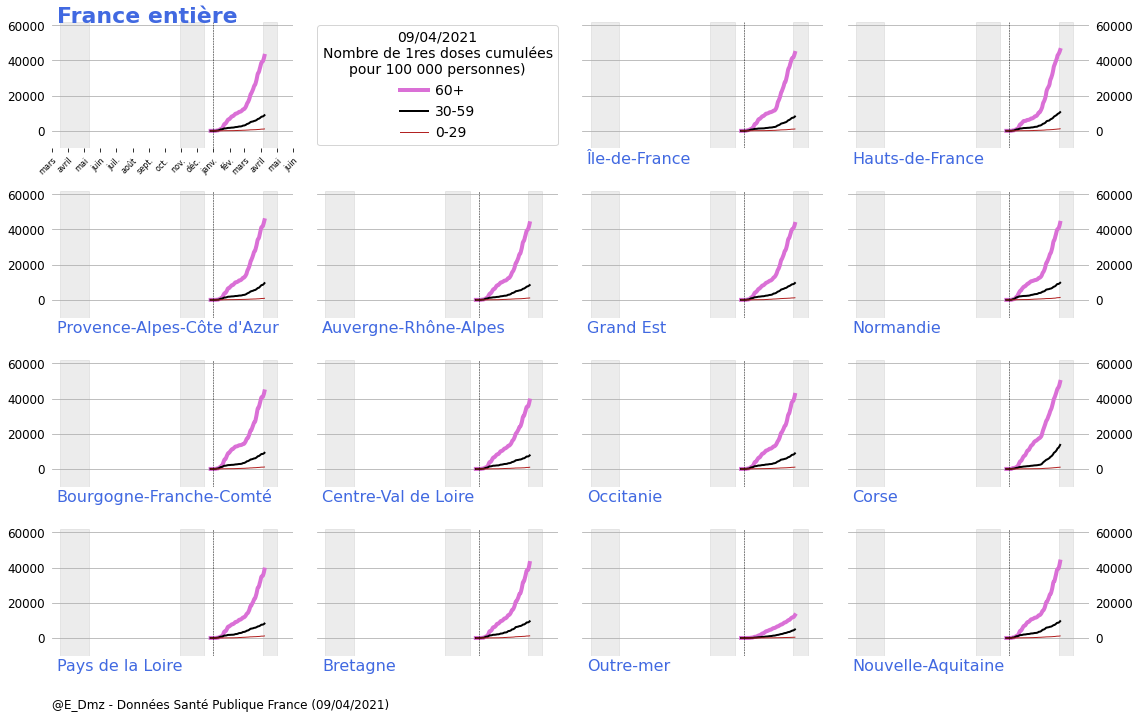

In [24]:
produce_fig(ymin = -10000,
    ymax = 70000,
            d = d2,
    column_to_plot = "taux dose 1",
    main_color = "orchid",
    title = '{}\nNombre de 1res doses cumulées\npour 100 000 personnes)'.format(date_text),
    regions_ordered = regions_ordered,
    fname = fname_output_synth +  '-fig-vac1',)

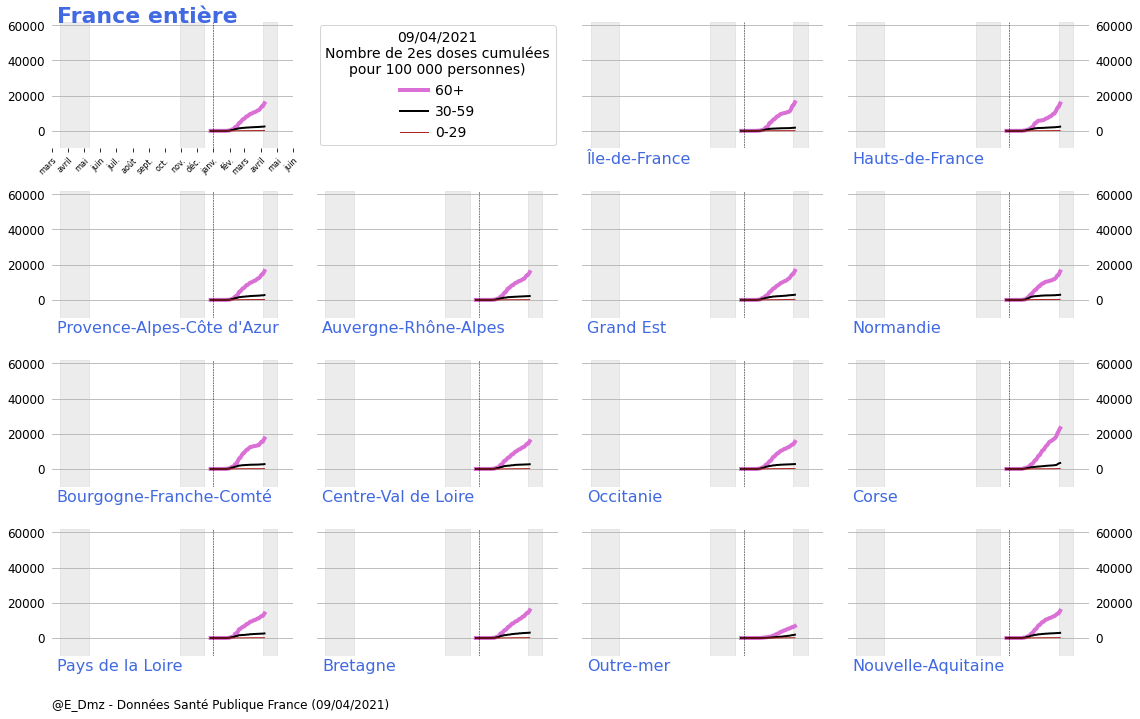

In [25]:
produce_fig(ymin = -10000,
    ymax = 70000,
            d = d2,
    column_to_plot = "taux dose 2",
    main_color = "orchid",
    title = '{}\nNombre de 2es doses cumulées\npour 100 000 personnes)'.format(date_text),
    regions_ordered = regions_ordered,
    fname = fname_output_synth +  '-fig-vac2',)

AttributeError: 'DataFrame' object has no attribute 'dep'

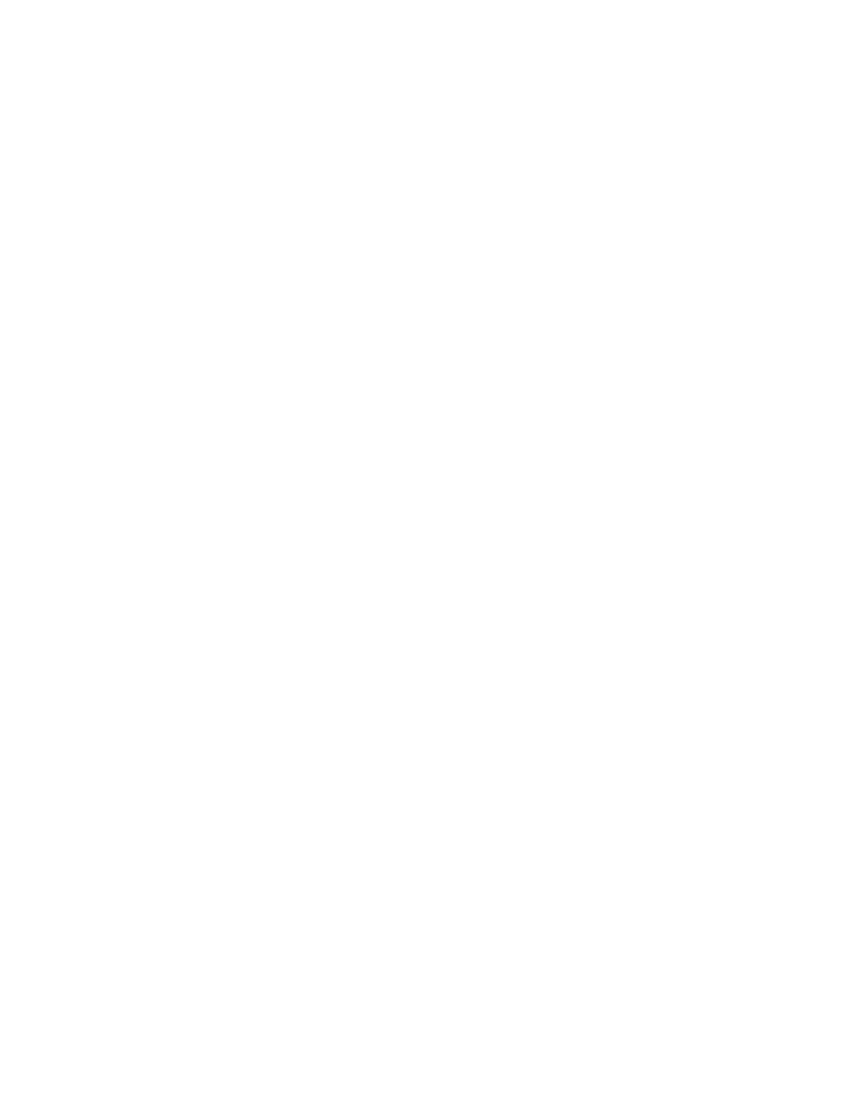

In [26]:
fig, axs = plt.subplots(11, 10, figsize = (15,20))
axs = axs.ravel()
for ax in axs:
    ax.set_axis_off()
for i, dep in enumerate(deps):
    sns.set_palette("mako",2)
    
    dplot = d.loc[d.dep == dep].loc[d.cl_age90 == 19]
    axs[i].plot(dplot.jour, dplot["incidence hebdo"], c = "darkturquoise", linewidth = 4)
    
    dplot = d.loc[d.dep == dep].loc[d.cl_age90 == 0]
    axs[i].plot(dplot.jour, dplot["incidence hebdo"], c = "black")
    
    dplot = d.loc[d.dep == dep].loc[d.cl_age90 == 89]
    #axs[i].plot(dplot.jour, dplot["incidence hebdo"], c = 'blue')
    axs[i].set_ylim(-500,1500)
    axs[i].set_axis_off()
    axs[i].set_title(dep, loc = 'left', y = 0.7, fontsize = 22, c = "darkturquoise")
    axs[i].set_title(dep_name[dep], x = -0.05, y = 0.2, rotation = 90, fontsize = 7)
fig.savefig("fig2.svg", pad_inches = 0)

In [ ]:
produce_fig_dep(d, deps)

In [ ]:
produce_fig_dep(d, reg2dep['Île-de-France'])

In [ ]:
for reg in regs:
    print(reg)
    produce_fig_dep(d, reg2dep[reg])